In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor, BaggingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
data = pd.read_csv("diamonds dataset.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.shape

(53940, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
data.drop(columns=["Unnamed: 0"], inplace=True, axis=1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
data["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [7]:
data["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [8]:
data["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [9]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
# x, y, z cant be zero
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)

In [11]:
data.shape

(53920, 10)

In [12]:
data.isnull().mean()*100

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

In [13]:
s = data.dtypes == "object"
objects = list(s[s].index)
print(objects)

lab = LabelEncoder()

for cols in objects:
    data[cols] = lab.fit_transform(data[cols])
    
data.head()

['cut', 'color', 'clarity']


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [14]:
#import plotly.express as px
#fig = px.scatter_3d(data, x="carat", y="cut", z="price")
#fig.show()

In [15]:
#sns.pairplot(data, hue="cut")

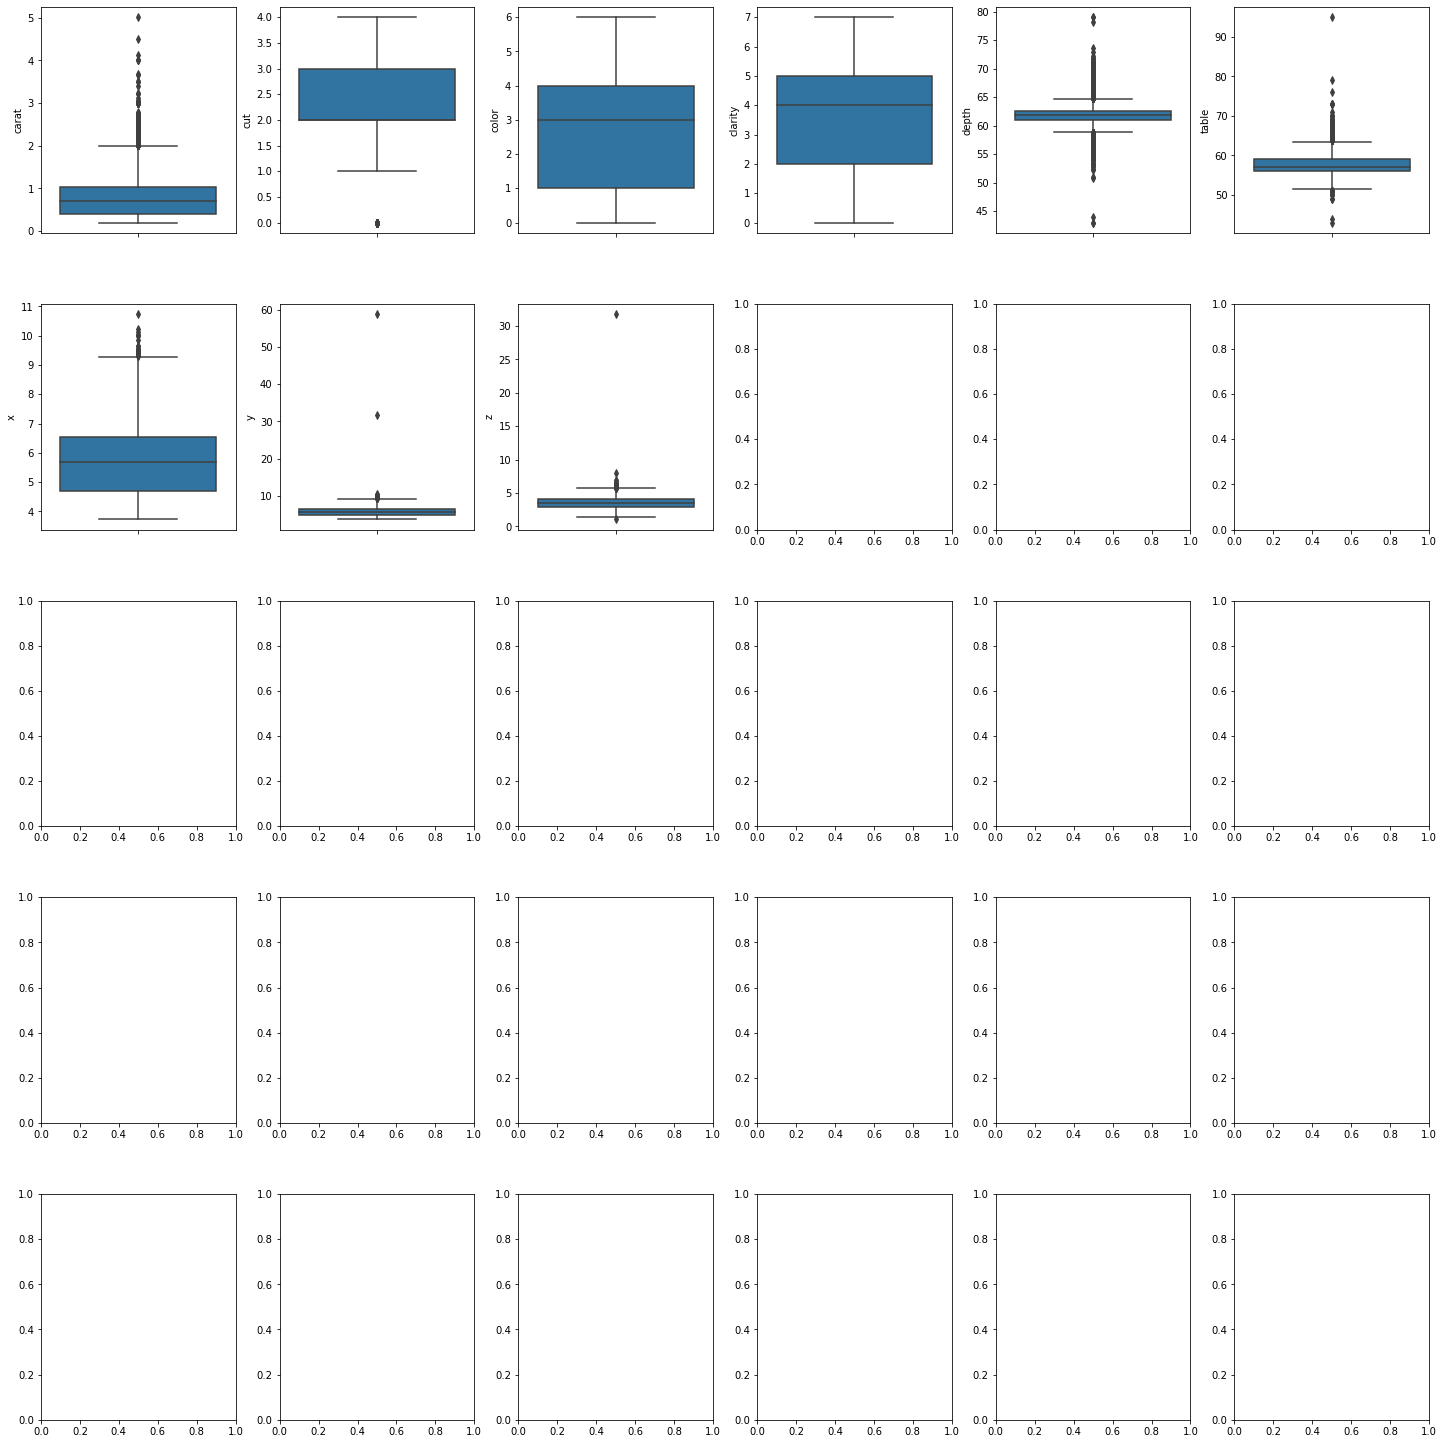

In [16]:
data1 = data.drop(columns=['price'], axis=1)

fig, ax = plt.subplots(ncols=6, nrows=5, figsize=(20, 20))
index = 0
ax = ax.flatten()

for col in data1.columns:
    sns.boxplot(y=col, data=data1, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [17]:
data["carat"] = data[(data["carat"] < data["carat"].mean() + 3 * data["carat"].std()) & (data["carat"] > data["carat"].mean() - 3 * data["carat"].std())] 
data["depth"] = data[(data["depth"] < data["depth"].mean() + 3 * data["depth"].std()) & (data["depth"] > data["depth"].mean() - 3 * data["depth"].std())] 
data["table"] = data[(data["table"] < data["table"].mean() + 3 * data["table"].std()) & (data["table"] > data["table"].mean() - 3 * data["table"].std())] 
#data["price"] = data[(data["price"] < data["price"].mean() + 3 * data["price"].std()) & (data["price"] > data["price"].mean() - 3 * data["price"].std())] 
data["x"] = data[(data["x"] < data["x"].mean() + 3 * data["x"].std()) & (data["x"] > data["x"].mean() - 3 * data["x"].std())] 
data["y"] = data[(data["y"] < data["y"].mean() + 3 * data["y"].std()) & (data["y"] > data["y"].mean() - 3 * data["y"].std())] 
data["z"] = data[(data["z"] < data["z"].mean() + 3 * data["z"].std()) & (data["z"] > data["z"].mean() - 3 * data["z"].std())] 


In [18]:
#data = data[data["x"]<30]
#data = data[data["y"]<30]
#data = data[(data["z"]<30) & (data["z"]>2)]
#data.shape

In [19]:
data.shape

(53920, 10)

In [20]:
data.isnull().mean()*100

carat      0.808605
cut        0.000000
color      0.000000
clarity    0.000000
depth      2.038205
table      1.420623
price      0.000000
x          0.808605
y          0.812315
z          0.817878
dtype: float64

In [21]:
data = data.dropna()
data.shape

(52552, 10)

In [22]:
data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,52552.000000,52552.000000,52552.000000,52552.000000,52552.000000,52552.000000,52552.000000,52552.000000,52552.000000,52552.000000
mean,0.780895,2.592461,2.573908,3.857227,0.780895,0.780895,3836.404000,0.780895,0.780895,0.780895
std,0.449400,0.989303,1.693015,1.720823,0.449400,0.449400,3869.153555,0.449400,0.449400,0.449400
min,0.200000,0.000000,0.000000,0.000000,0.200000,0.200000,326.000000,0.200000,0.200000,0.200000
25%,0.400000,2.000000,1.000000,2.000000,0.400000,0.400000,940.000000,0.400000,0.400000,0.400000
50%,0.700000,2.000000,3.000000,4.000000,0.700000,0.700000,2363.000000,0.700000,0.700000,0.700000
75%,1.040000,3.000000,4.000000,5.000000,1.040000,1.040000,5242.000000,1.040000,1.040000,1.040000
max,2.210000,4.000000,6.000000,7.000000,2.210000,2.210000,18818.000000,2.210000,2.210000,2.210000


In [23]:
x = data.drop(columns="price")
y = data["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None)

In [24]:
lr = LinearRegression()

In [25]:
dtr = DecisionTreeRegressor(max_depth=20)

In [26]:
br = BaggingRegressor()

In [27]:
rfr = RandomForestRegressor(criterion="squared_error")

In [28]:
estimator = [("lr",lr), ("dtr",dtr), ("rfr",rfr)]

vr = VotingRegressor(estimators=estimator)

In [29]:
models = [("lr",lr), ("dtr",dtr), ("vr",vr), ("br",br), ("rfr",rfr)]

for i in models:
    var = i[1]
    var.fit(x_train,y_train)
    pred = var.predict(x_test)
    #print("mae ",i[0],": ",mean_absolute_error(y_test,pred))
    print("r2_score ",i[0],": ",r2_score(y_test,pred)*100)

r2_score  lr :  87.881268754685
r2_score  dtr :  97.4567755619593
r2_score  vr :  96.87135224270598
r2_score  br :  97.86535305570706
r2_score  rfr :  97.91672578827668
